# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
import kraken
from kraken import pageseg
# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# print(small_zip.namelist())
# the rest is up to you!
threshold  = 200 
table  =  []
for  i  in  range( 256 ):
    if  i  <  threshold:
        table.append(0)
    else :
        table.append(1)

In [13]:
#class defination
from PIL import Image
from PIL import ImageDraw
class Image_store():
    def __init__(self,file_name,origin):
        self.file_name=file_name
        self.picture_origin=origin
        self.gray_picture=origin.convert("L")
        self.bin_picture=self.gray_picture.point(table,"1" )
        self.text=""
        self.face_picture=None
        self.is_match_test=False
# class faceLocation():
#     def __init__(self,location):
#         self.location=location
#         self.center_location=[(location[0]+location[2])/2,(location[1]+location[3])/2]
#         self.times=0
#         self.isDelete=False
def face_check_function(zip_file_name,target_text):
    small_zip=zipfile.ZipFile("readonly/{}".format(zip_file_name))
    name_list=small_zip.infolist()
    # init picture info list
    image_store_list=[]
    for name in name_list:
        with small_zip.open(name,mode='r') as image_file:
            image=Image.open(image_file)
            image_store_list.append(Image_store(name,image))
    for image in image_store_list:
        text=pytesseract.image_to_string(image.bin_picture)
        image.text=text

    for image in image_store_list:
        if target_text in image.text:
            image.is_match_test=True
            gray_array=np.array(image.gray_picture)
            faces = face_cascade.detectMultiScale(gray_array,1.3,7,cv.CASCADE_SCALE_IMAGE,(50,50),(400,400))
            picture_size=200
            picture_wid=6
            picture_height=len(faces)/6
            if len(faces)%6:
                picture_height+=1
            if len(faces)!=0:
                show_image=Image.new(image.picture_origin.mode,(picture_size*picture_wid,picture_size*int(picture_height)))
                image.face_picture=show_image
            x_picture=0
            y_picture=0
            for x,y,w,h in faces:
                bounding_box=[x,y,x+w,y+h]
                face_image=image.picture_origin.crop(bounding_box)
#                 display(face_image)
                resize_image=face_image.resize([picture_size,picture_size], Image.NEAREST)
#                 display(resize_image)
                if len(faces)!=0:
                    show_image.paste(resize_image, (x_picture, y_picture) )
                if x_picture+resize_image.width == show_image.width:
                    x_picture=0
                    y_picture=y_picture+resize_image.height
                else:
                    x_picture=x_picture+resize_image.width
    for image in image_store_list:
        if image.is_match_test:
            print("Result find in {}".format(image.file_name.filename))
            if image.face_picture is not None:
                display(image.face_picture)
            else:
                print("But there were no faces in that file")

Result find in a-0.png


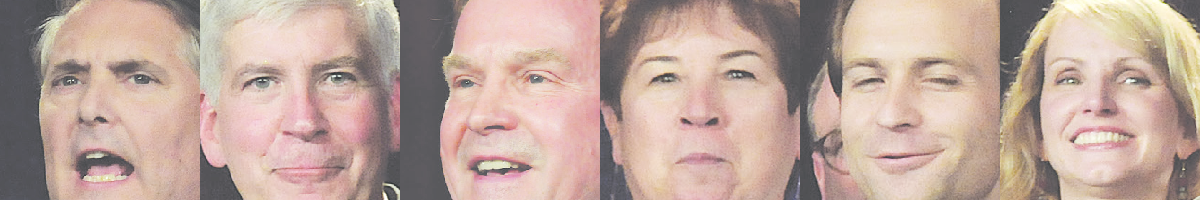

Result find in a-3.png


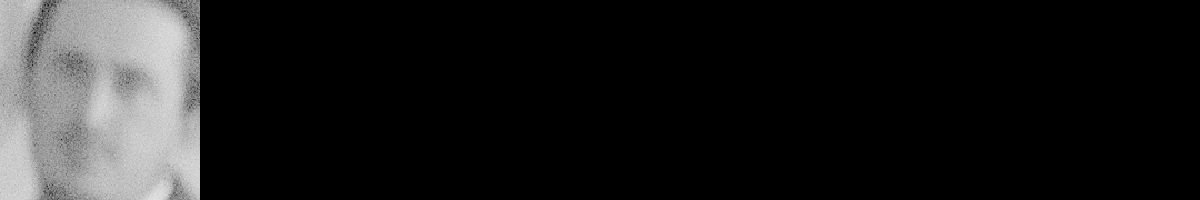

In [7]:
face_check_function("small_img.zip","Christopher")

Result find in a-0.png


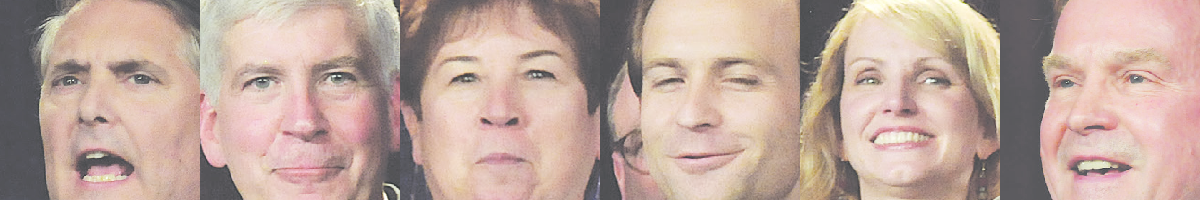

Result find in a-1.png


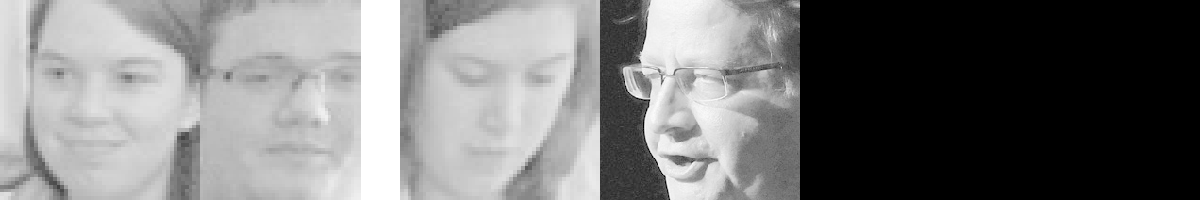

Result find in a-10.png
But there were no faces in that file
Result find in a-13.png


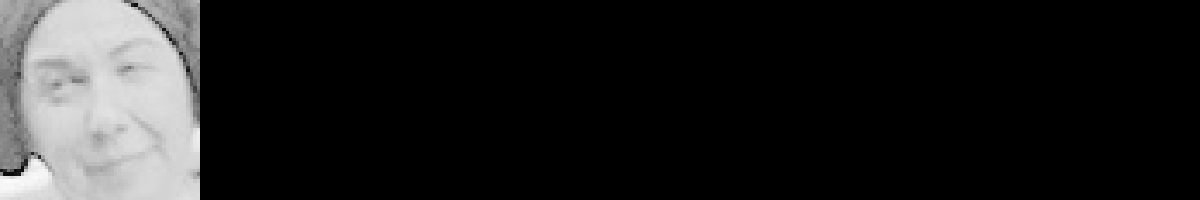

Result find in a-2.png


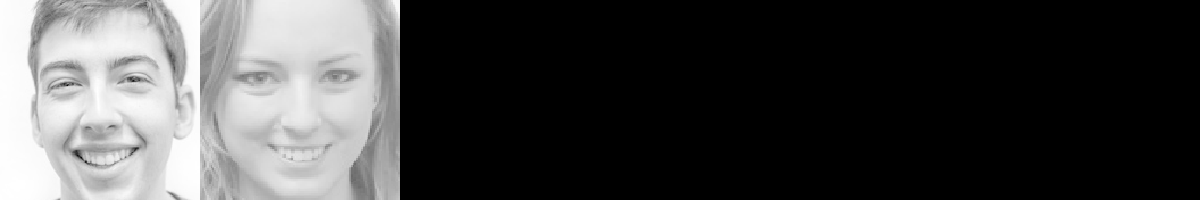

Result find in a-3.png


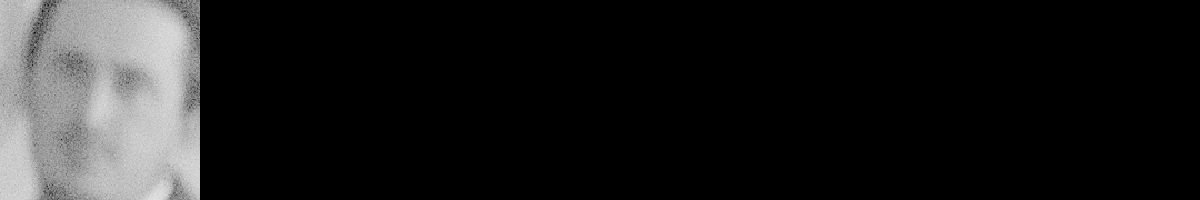

Result find in a-8.png
But there were no faces in that file


In [14]:
face_check_function("images.zip","Mark")